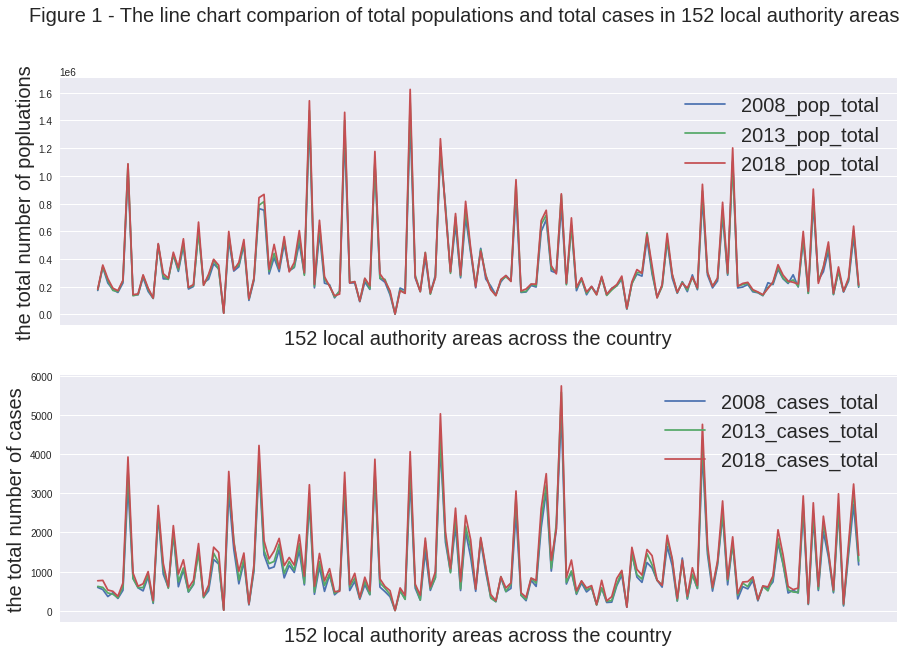

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms




data = pd.read_csv('coursework_1_data_2019.csv')

pop_total = ['2008_pop_total', '2013_pop_total', '2018_pop_total']
cases_total = ['2008_cases_total', '2013_cases_total', '2018_cases_total']

fig, axis = plt.subplots(2, 1, sharex=True, figsize=(15,10))

plt.style.use('seaborn')
axis[0].plot(list(data.index), data[pop_total[0]], label=pop_total[0])
axis[0].plot(list(data.index), data[pop_total[1]], label=pop_total[1])
axis[0].plot(list(data.index), data[pop_total[2]], label=pop_total[2])
axis[0].set_xlabel('152 local authority areas across the country', fontsize=20)
axis[0].set_ylabel('the total number of popluations', fontsize=20)
axis[0].legend(fontsize=20)

axis[1].plot(list(data.index), data[cases_total[0]], label=cases_total[0])
axis[1].plot(list(data.index), data[cases_total[1]], label=cases_total[1])
axis[1].plot(list(data.index), data[cases_total[2]], label=cases_total[2])
axis[1].set_xlabel('152 local authority areas across the country', fontsize=20)
axis[1].set_ylabel('the total number of cases', fontsize=20)
axis[1].legend(fontsize=20)
plt.suptitle('Figure 1 - The line chart comparion of total populations and total cases in 152 local authority areas', fontsize=20)
plt.xticks([])
plt.savefig('Figure 1 - line chart comparion of pop_total and cases_total')
plt.show()


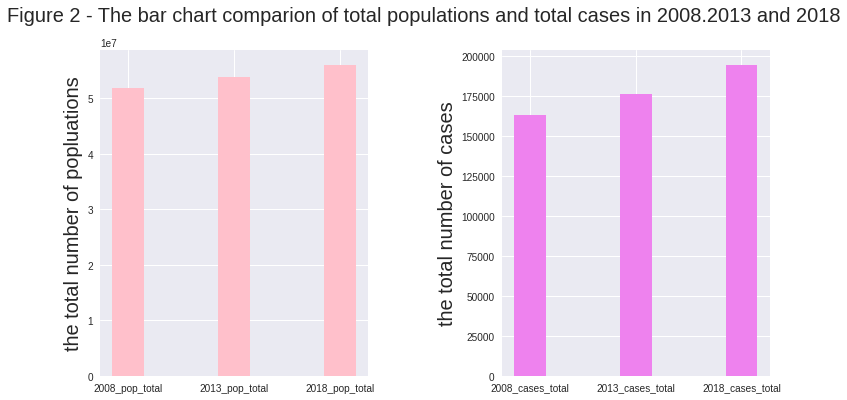

In [70]:
fig, axis = plt.subplots(1, 2,figsize=(12,6))
axis[0].bar(pop_total, data[pop_total].sum(), width=0.3, color='pink')
axis[0].set_ylabel('the total number of popluations', fontsize=20)
axis[1].bar(cases_total, data[cases_total].sum(), width=0.3, color='violet')
axis[1].set_ylabel('the total number of cases', fontsize=20)
plt.subplots_adjust(wspace=0.5)
plt.suptitle('Figure 2 - The bar chart comparion of total populations and total cases in 2008.2013 and 2018', fontsize=20)
plt.savefig('Figure 2 - bar chart comparion of pop_total and cases_total')
plt.show()


In [8]:
data = pd.read_csv('coursework_1_data_2019.csv')
from sklearn.preprocessing import LabelEncoder as LE
# The next lines import the necessary packages to perform the regression:
import statsmodels.api as sms
import numpy as np

#data = np.genfromtxt(data_filename,delimiter = ',')

str_columns = ['region', 'local_authority_type']
data2 = data.copy()
for col in str_columns:
    encCG = LE()
    data2[col] = encCG.fit_transform(data2[col])
    print(pd.DataFrame(encCG.classes_))


y_values = data2[['2018_cases_total']]
explained_variable = ['2008_cases_total', '2013_cases_total', '2008_pop_total', '2013_pop_total', 
                      'total_budget','clean_air', 'clean_environ', 'health_training', 'school_awareness', 
                      'media_awareness','sub_counselling', 'region', 'local_authority_type']
x_values = data2[explained_variable]

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
predictor_coeffs  = regression_model_b.params[1:]
constant          = regression_model_b.params[0] # called the 'intercept' in simple regression
Rsquared          = regression_model_b.rsquared
MSE               = regression_model_b.mse_resid
pvalues_T         = regression_model_b.pvalues[1:]
pvalue_F          = regression_model_b.f_pvalue

# Note that predictor_coeffs is a list of the best-fit coefficients for x1, x2, x3, ...
# Similarly, pvalues_T is a list of the p-values associated with each of these variables in turn.

# Print these summary stats:
print("predictor coefficients =", predictor_coeffs)
print("constant               =", constant)
print("Rsquared               =", Rsquared)
print("MSE                    =", MSE)
print("T-test pvalues         =", pvalues_T)
print("F-test pvalue          =", pvalue_F)

                          0
0             East Midlands
1           East of England
2                    London
3                North East
4                North West
5                South East
6                South West
7             West Midlands
8  Yorkshire and the Humber
                         0
0           london_borough
1     metropolitan_borough
2  non_metropolitan_county
3             other_london
4        unitary_authority
                            OLS Regression Results                            
Dep. Variable:       2018_cases_total   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4280.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          4.87e-172
Time:                        15:07:37   Log-Likelihood:                -825.87
No. Observations:                 152   AIC:                             1678.
Df Re

                            OLS Regression Results                            
Dep. Variable:       2018_cases_total   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     7547.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          4.22e-124
Time:                        20:30:44   Log-Likelihood:                -595.74
No. Observations:                 106   AIC:                             1201.
Df Residuals:                     101   BIC:                             1215.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   48.3098 

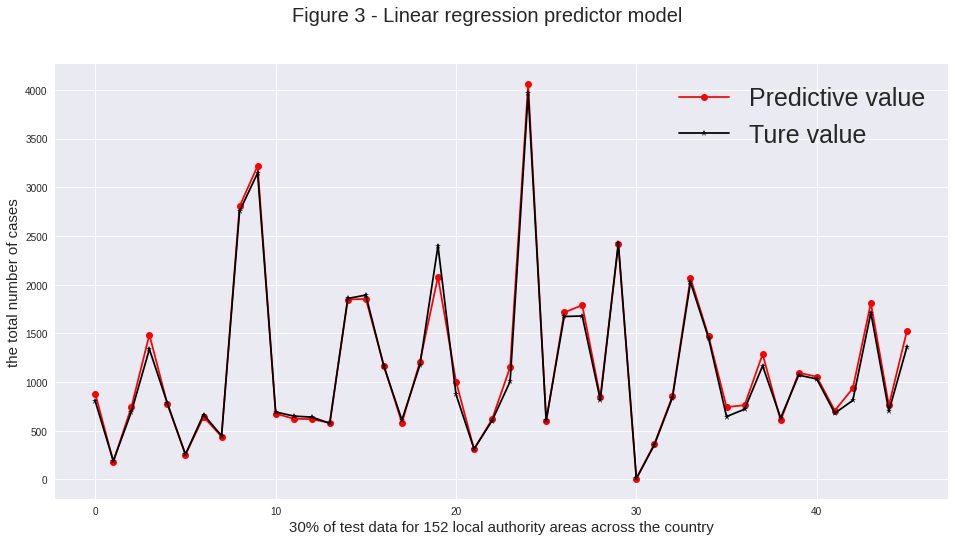

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



str_columns = ['region', 'local_authority_type']
data3 = data.copy()
for col in str_columns:
    encCG = LE()
    data3[col] = encCG.fit_transform(data3[col])

y = data3[['2018_cases_total']]
pv = ['2008_cases_total', '2013_cases_total',  'region', 'local_authority_type']
x = data3[pv]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

# build the linear model
x_train_cons = sms.add_constant(x_train)  # this ensures that it adds a constant line to your model
model = sms.OLS(y_train, x_train_cons)
est = model.fit()
print(est.summary())

x_test_cons = sms.add_constant(x_test)
pred = est.predict(x_test_cons)


'''test'''
def get_mape(y_true, y_pred):  
    y_true, y_pred = np.array(y_true).reshape(1, -1), np.array(y_pred).reshape(1, -1)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def get_eval(y_test, pred): 
    mae = mean_absolute_error(y_test, pred)
    print("MAE = %0.3f" % mae)
    mse = mean_squared_error(y_test, pred)
    print("MSE = %0.3f" % mse)
    mape = get_mape(y_test, pred)
    print("MAPE = %0.3f%%" % mape)
    return mae, mse, mape


get_eval(y_test, pred)

plt.figure(figsize=(16,8))
plt.plot(range(0, len(y_test)), y_test, 'r-o', label='Predictive value')
plt.plot(range(0, len(y_test)), pred, 'g-*', label='Ture value', c='black')
plt.suptitle('Figure 3 - Linear regression predictor model', fontsize=20)
plt.xlabel('30% of test data for 152 local authority areas across the country', fontsize=15)
plt.ylabel('the total number of cases', fontsize=15)
plt.legend(fontsize=25)
plt.savefig('Figure 3 - linear regression predictor model')
plt.show()